<a href="https://colab.research.google.com/github/kenken0830/preprocessing/blob/master/autoalima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
!pip install dfply 
from dfply import *
df = pd.read_csv("/content/drive/MyDrive/data/hungary_chickenpox.csv")
df.head()

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,36,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,28,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,51,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,42,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,40,61,49,11,124,63,56,7,47,85,60


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      522 non-null    object
 1   BUDAPEST  522 non-null    int64 
 2   BARANYA   522 non-null    int64 
 3   BACS      522 non-null    int64 
 4   BEKES     522 non-null    int64 
 5   BORSOD    522 non-null    int64 
 6   CSONGRAD  522 non-null    int64 
 7   FEJER     522 non-null    int64 
 8   GYOR      522 non-null    int64 
 9   HAJDU     522 non-null    int64 
 10  HEVES     522 non-null    int64 
 11  JASZ      522 non-null    int64 
 12  KOMAROM   522 non-null    int64 
 13  NOGRAD    522 non-null    int64 
 14  PEST      522 non-null    int64 
 15  SOMOGY    522 non-null    int64 
 16  SZABOLCS  522 non-null    int64 
 17  TOLNA     522 non-null    int64 
 18  VAS       522 non-null    int64 
 19  VESZPREM  522 non-null    int64 
 20  ZALA      522 non-null    int64 
dtypes: int64(20), ob

In [14]:
df2 = df >> select(X["Date"],X["BUDAPEST"])

In [15]:
result_mean = pd.DataFrame(0,
                  index=np.arange(13),
                  columns=["pred", "true_value"])
split = len(df2) - 13
nrow = len(df2)
for i in range(split,nrow):
  X_train =  df2.iloc[0:i] 
  pred = X_train.mean(axis=0)
  result_mean.iloc[i-(split),0] = pred.values
  result_mean.iloc[i-(split),1] = df2.iloc[i,1]

In [16]:
result_mean

,pred,true_value
0,102.377210,17
1,102.209804,21
2,102.050881,34
3,101.917969,28
4,101.773879,44
5,101.661479,33
6,101.528155,85
7,101.496124,16
8,101.330754,95
9,101.318533,43


In [17]:
!pip install -q pmdarima
import pmdarima as pm

In [18]:
result_autoarima = pd.DataFrame(0,
                  index=np.arange(13),
                  columns=["pred", "true_value"])
df_arima = df2.set_index(["Date"])
split = len(df_arima) - 13
nrow = len(df_arima)
for i in range(split,nrow):
  X_train =  df_arima.iloc[0:i] 
  arima_model = pm.auto_arima(X_train,
                              start_p=1, max_p=5, start_q=1, max_q=5,
                              start_P=1, max_P=5, start_Q=1, max_Q=5, 
                              seasonal=True, D=10, max_D=10,
                              stepwise=True)
  pred = arima_model.predict(n_periods=1, return_conf_int=False)
 
  result_autoarima.iloc[i-(split),0] = pred[0]
  result_autoarima.iloc[i-(split),1] = df_arima.iloc[i,0]
result_autoarima["mae"] = abs(result_autoarima["true_value"]-result_autoarima["pred"])
result_autoarima["mae"].mean()

35.72198544890885

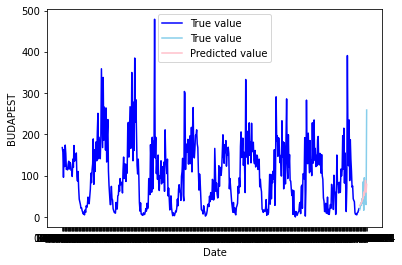

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.lineplot(x=df2["Date"]>>head(-13),y=df2["BUDAPEST"]>>head(-13),color="blue")
sns.lineplot(x=df2["Date"]>>tail(13),y=df2["BUDAPEST"]>>tail(13),color="skyblue")
sns.lineplot(x =(df2["Date"]>>tail(13)).reset_index(drop=True),y=result_autoarima["pred"], color="pink")
ax.legend(["True value", "True value", "Predicted value"])
sns.set_theme(style="darkgrid")
plt.show()

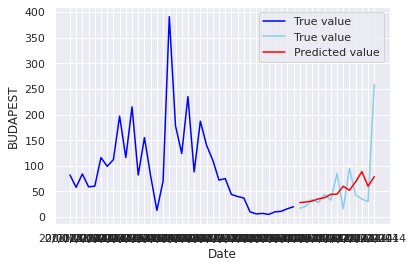

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.lineplot(x=df2["Date"] >>tail(50) >> head(-13),y=df2["BUDAPEST"]>> tail(50) >> head(-13),color="blue",legend='auto')
sns.lineplot(x=df2["Date"]>>tail(13),y=df2["BUDAPEST"]>>tail(13),color="skyblue",legend='auto')
sns.lineplot(x =(df2["Date"]>>tail(13)).reset_index(drop=True),y=result_autoarima["pred"], color="red",legend='auto')
ax.legend(["True value", "True value", "Predicted value"])
sns.set_theme(style="darkgrid")
plt.show()